In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/Users/pluto7/Desktop/git_data/Handling_Missing_data.ipynb/train.csv")

In [3]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape


(60, 81)

In [5]:
df['MSSubClass'].describe()


count     60.000000
mean      49.916667
std       41.614572
min       20.000000
25%       20.000000
50%       25.000000
75%       60.000000
max      190.000000
Name: MSSubClass, dtype: float64

In [6]:
import seaborn as sns


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

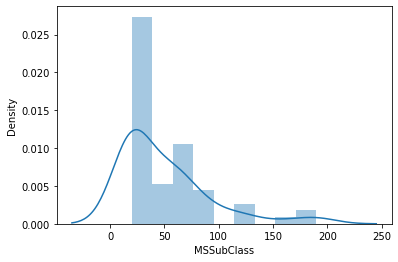

In [7]:
sns.distplot(df['MSSubClass'])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSSubClass'>

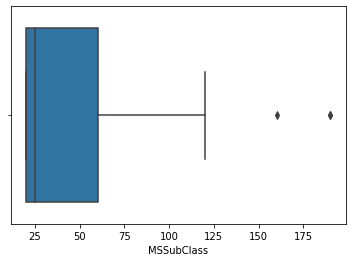

In [8]:
sns.boxplot(df['MSSubClass'])


In [9]:
upper_limit = df['MSSubClass'].quantile(0.99)
upper_limit

190.0

In [10]:
lower_limit = df['MSSubClass'].quantile(0.01)
lower_limit

20.0

In [11]:
new_df = df[(df['MSSubClass'] <= 190.0) & (df['MSSubClass'] >= 20.0)]
new_df['MSSubClass'].describe()

count     60.000000
mean      49.916667
std       41.614572
min       20.000000
25%       20.000000
50%       25.000000
75%       60.000000
max      190.000000
Name: MSSubClass, dtype: float64

In [12]:
df['MSSubClass'].describe()


count     60.000000
mean      49.916667
std       41.614572
min       20.000000
25%       20.000000
50%       25.000000
75%       60.000000
max      190.000000
Name: MSSubClass, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

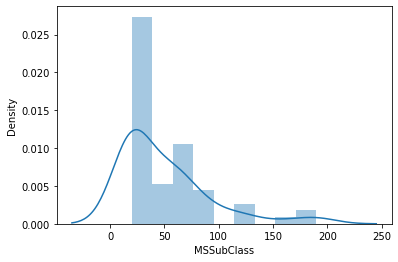

In [13]:
sns.distplot(new_df['MSSubClass'])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSSubClass'>

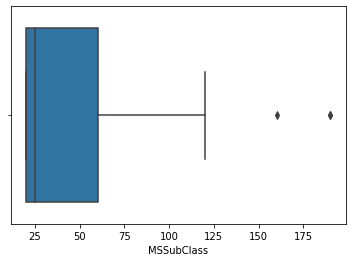

In [14]:
sns.boxplot(new_df['MSSubClass'])


In [15]:
# Capping --> Winsorization
df['MSSubClass'] = np.where(df['MSSubClass'] >= upper_limit,
        upper_limit,
        np.where(df['MSSubClass'] <= lower_limit,
        lower_limit,
        df['MSSubClass']))

In [16]:
df.shape


(60, 81)

In [17]:
df['MSSubClass'].describe()


count     60.000000
mean      49.916667
std       41.614572
min       20.000000
25%       20.000000
50%       25.000000
75%       60.000000
max      190.000000
Name: MSSubClass, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

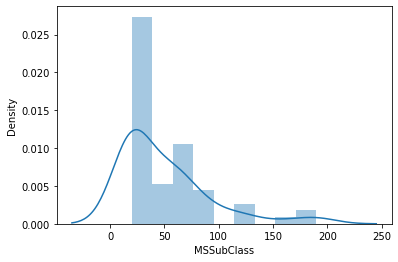

In [18]:
sns.distplot(df['MSSubClass'])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSSubClass'>

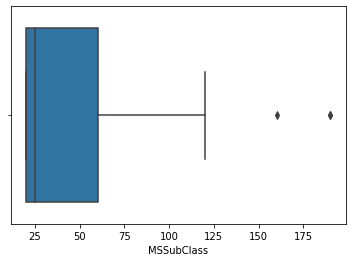

In [20]:
sns.boxplot(df['MSSubClass'])
